In [ ]:
SELECT
si.roll_number,
si.name

fromstudent_information Si 
INNER JOIN examination_marks em  
ON si.roll_number = em.roll_number

where
(em.subject_one + em.subject_Two + em.subject_three) <100

# Perkenalan
___


- Nama        : Salman Hamka De Qais
- Batch       : BSD 006
- Tugas       : Milestone2 Phase1
- Objecective : Tujuan dari analisis ini adalah untuk mengembangkan model prediksi yang dapat menentukan kemungkinan seseorang mengajukan klaim asuransi mobil berdasarkan berbagai fitur seperti usia, jenis kelamin, pengalaman mengemudi, pendidikan, pendapatan, kepemilikan kendaraan, tahun kendaraan, status pernikahan, jumlah anak, kode pos, jarak tempuh tahunan, tipe kendaraan, pelanggaran kecepatan, DUI (driving under influence), dan riwayat kecelakaan.

- Latar Belakang :Industri asuransi mobil menghadapi tantangan dalam mengelola risiko dan menentukan premi yang tepat untuk pelanggan mereka. Dengan meningkatnya jumlah data yang tersedia, perusahaan asuransi dapat menggunakan teknik machine learning untuk menganalisis data pelanggan dan mengidentifikasi faktor-faktor yang paling berpengaruh dalam pengajuan klaim. Hal ini tidak hanya membantu dalam menentukan premi yang lebih akurat tetapi juga dalam mencegah penipuan klaim asuransi.

- Problem Statement :Masalah utama yang ingin diselesaikan adalah bagaimana memprediksi dengan akurat apakah seorang pelanggan akan mengajukan klaim asuransi mobil atau tidak. Ini melibatkan:

1. Identifikasi Fitur Penting: Menentukan fitur-fitur mana yang paling berpengaruh dalam memprediksi klaim asuransi.
2. Pemilihan Model: Memilih dan melatih model machine learning yang sesuai untuk meningkatkan akurasi prediksi.
3. Evaluasi Model: Menggunakan metrik evaluasi seperti f1-score untuk menilai performa model dan memastikan model dapat memberikan prediksi yang andal pada data yang belum pernah dilihat sebelumnya.

# Libraries
---


Pada project kali ini libraries yang akan digunakan adalah sebagai berikut

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
import phik 
from phik import resources #import module resources dari libraries phik
from phik.binning import bin_data #digunakan untuk mengelompokkan data
from phik.report import plot_correlation_matrix #digunakan untuk visuaslisasi hubungan antar variable secara grafis
# import feature engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier




# Data Loading
___

- Data kali ini berumber dari Dataset : Car_Insurance_Claim.csv
- Link Kaggle : 'https://www.kaggle.com/datasets/sagnik1511/car-insurance-data'

In [2]:
df = pd.read_csv('Car_Insurance_Claim.csv') #membaca nama folde csv 
pd.set_option('display.max.columns', None)
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [3]:
df['EDUCATION'].unique()

array(['high school', 'none', 'university'], dtype=object)

In [4]:
#ubah nama kolom menjadi huruf kecil semua
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

In [5]:
del df['id'] #mendelete kolom ID

In [6]:
df

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [7]:
# melihat kolom dan baris di dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 10000
Number of columns: 18


In [8]:
#melakukan cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [9]:
#melakukan cek duplikasi data
df.duplicated().sum()

12

In [10]:
#hapus data yang terduplicated, dengan menjalankan perintah berikut
df.drop_duplicates(inplace=True)  


In [11]:
#melakukan cek duplikasi data
df.duplicated().sum()

0

In [12]:
df.columns #cek data column

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

In [13]:
# cek missing value
df.isna().sum()

age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           970
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         954
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

In [14]:
df.dropna(inplace=True) #menedelete missing value

In [15]:
# cek missing value
df.isna().sum()

age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

In [16]:
# cek statistik deskriptif data
df.describe()

,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.00000,8149.000000,8149.000000,8149.000000,8149.000000
mean,0.516368,0.699227,0.501043,0.689287,19725.567922,11693.45932,1.485581,0.240766,1.065530,0.311204
std,0.137684,0.458622,0.500030,0.462814,18784.308198,2822.35147,2.244711,0.557408,1.665623,0.463014
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.00000,0.000000,0.000000,0.000000,0.000000
25%,0.417891,0.000000,0.000000,0.000000,10238.000000,10000.00000,0.000000,0.000000,0.000000,0.000000
50%,0.526759,1.000000,1.000000,1.000000,10238.000000,12000.00000,0.000000,0.000000,0.000000,0.000000
75%,0.620074,1.000000,1.000000,1.000000,32765.000000,14000.00000,2.000000,0.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.00000,22.000000,6.000000,15.000000,1.000000


In [17]:
#menampilkan 10 data teratas
df.head(5)

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [18]:
df.columns

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

# DATA UNDERSTANDING
___

1. age (usia): Usia pengemudi dapat mempengaruhi risiko kecelakaan. Misalnya, pengemudi yang lebih muda cenderung memiliki risiko kecelakaan yang lebih tinggi dibandingkan pengemudi yang lebih tua.

2. gender (jenis kelamin): Beberapa studi menunjukkan bahwa jenis kelamin dapat mempengaruhi perilaku mengemudi dan risiko kecelakaan. Perusahaan asuransi mungkin menggunakan informasi ini untuk menyesuaikan premi.

3. race (ras): Meskipun ini adalah atribut sensitif dan sering kali tidak digunakan dalam penentuan premi karena alasan etika dan hukum, beberapa data asuransi mungkin mencatat informasi ini untuk analisis statistik atau penelitian.

4. driving_experience (pengalaman mengemudi): Pengalaman mengemudi yang lebih lama biasanya berarti pengemudi lebih terampil dan kurang mungkin terlibat dalam kecelakaan.

5. education (pendidikan): Tingkat pendidikan kadang-kadang digunakan untuk memprediksi perilaku risiko. Pengemudi dengan pendidikan lebih tinggi mungkin dianggap lebih bertanggung jawab.

6. income (pendapatan): Pendapatan bisa menjadi indikator kemampuan untuk memelihara kendaraan dan mengikuti peraturan lalu lintas, yang dapat mempengaruhi risiko kecelakaan.

7. credit_score (skor kredit): Skor kredit sering digunakan oleh perusahaan asuransi sebagai indikator keandalan dan tanggung jawab finansial, yang bisa berkorelasi dengan perilaku mengemudi yang aman.

8. vehicle_ownership (kepemilikan kendaraan): Apakah pengemudi memiliki kendaraan atau menyewanya bisa mempengaruhi cara mereka mengemudi. Pemilik kendaraan mungkin lebih berhati-hati dibandingkan dengan penyewa.

9. vehicle_year (tahun kendaraan): Tahun pembuatan kendaraan dapat mempengaruhi risiko kecelakaan dan biaya perbaikan. Kendaraan yang lebih tua mungkin kurang aman dibandingkan kendaraan baru.

10. married (status pernikahan): Status pernikahan kadang-kadang digunakan sebagai indikator stabilitas dan tanggung jawab, yang bisa mempengaruhi risiko mengemudi.

11. children (anak-anak): Pengemudi dengan anak mungkin mengemudi lebih hati-hati, tetapi mereka juga mungkin lebih sering terlibat dalam perjalanan yang berisiko, seperti mengantar anak ke sekolah.

12. postal_code (kode pos): Lokasi tempat tinggal bisa mempengaruhi risiko kecelakaan. Area dengan lalu lintas tinggi atau tingkat kriminalitas tinggi mungkin memiliki risiko kecelakaan yang lebih besar.

13. annual_mileage (jarak tempuh tahunan): Pengemudi yang menempuh jarak lebih banyak setiap tahun cenderung memiliki risiko kecelakaan yang lebih tinggi karena lebih sering berada di jalan.

14. vehicle_type (jenis kendaraan): Jenis kendaraan (misalnya, mobil sport, SUV, truk) dapat mempengaruhi risiko kecelakaan dan biaya perbaikan.

15. speeding_violations (pelanggaran kecepatan): Pengemudi dengan riwayat pelanggaran kecepatan mungkin dianggap lebih berisiko dan cenderung mendapatkan premi yang lebih tinggi.

16. duis (mengemudi dalam pengaruh alkohol atau narkoba): Riwayat DUI (Driving Under Influence) adalah indikator kuat dari risiko mengemudi yang tinggi.

17. past_accidents (kecelakaan sebelumnya): Pengemudi dengan riwayat kecelakaan cenderung dianggap lebih berisiko oleh perusahaan asuransi.

# Exploratiory Data Analysis
___

### PLOT1 MELIHAT DISTRIBUSI USIA

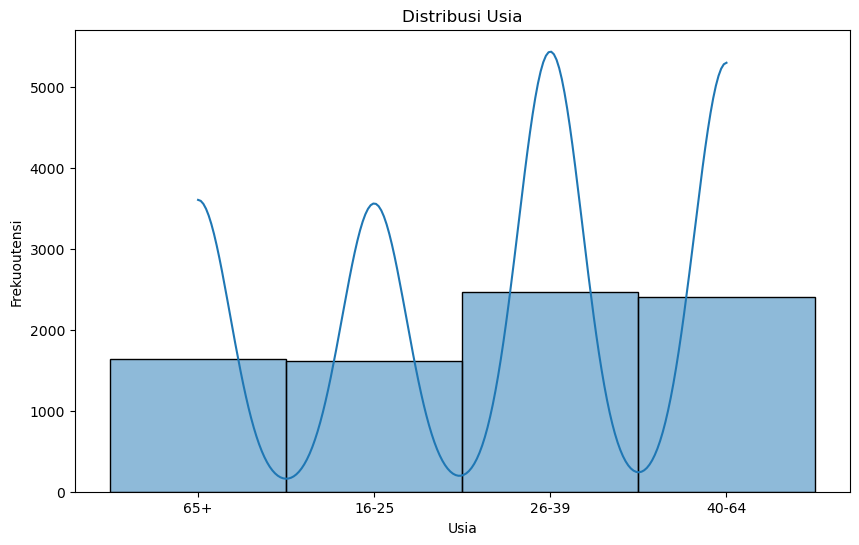

In [19]:
#distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuoutensi')
plt.show()



-  Kesimpulan :Berdasarkan plot yang Anda berikan, dapat disimpulkan bahwa distribusi usia penduduk di Amerika Serikat tidak merata. Kelompok usia terbesar adalah 65+, diikuti oleh 40-64, 26-39, 16-25, dan 0. Kelompok usia terkecil adalah 26-39.

- Analisis :Plot ini menunjukkan bahwa ada beberapa tren dalam distribusi usia penduduk di Amerika Serikat. Pertama, ada proporsi yang tinggi dari penduduk berusia 65 tahun atau lebih.

### PLOT2 MELIHAT DISTRIBUSI JENIS KELAMIN

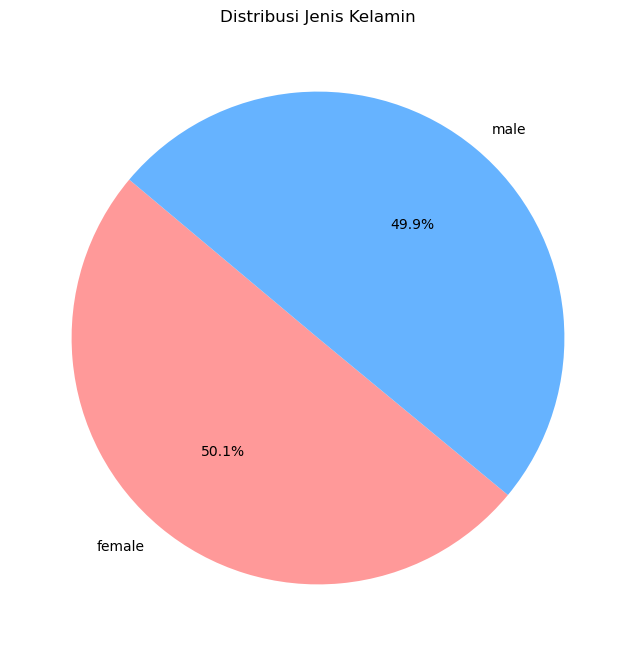

In [20]:
#Pie Chart untuk Distribusi Jenis Kelamin
plt.figure(figsize=(8, 8))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribusi Jenis Kelamin')
plt.show()



- Kesimpulan Plot Distribusi Jenis Kelamin : 
Berdasarkan plot distribusi jenis kelamin yang Anda berikan, dapat disimpulkan bahwa terdapat keseimbangan antara jumlah laki-laki dan perempuan.

- Berikut adalah detailnya:

Persentase laki-laki: 49,9% &
Persentase perempuan: 50,1%

Hal ini digambarkan dengan dua lingkaran berwarna biru dan merah muda. Lingkaran biru mewakili laki-laki dengan persentase 49,9%, sedangkan lingkaran merah muda mewakili perempuan dengan persentase 50,1%.

- Kesimpulan:

Berdasarkan data di atas, dapat dikatakan bahwa distribusi jenis kelamin dalam data tersebut seimbang. Hal ini berarti bahwa jumlah laki-laki dan perempuan hampir sama.

### PLOT3 MELIHAT DISTRIBUSI CLAIM ASURANSI

C:\Users\Salman\AppData\Local\Temp\ipykernel_31952\3445091023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outcome', data=df, palette='viridis')


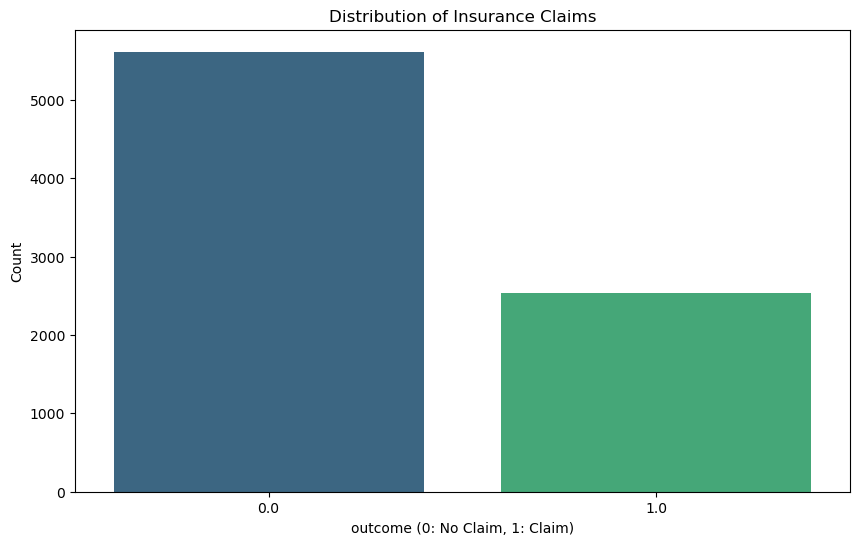

In [21]:
# Plot 1: Distribution of Outcome
plt.figure(figsize=(10, 6))
sns.countplot(x='outcome', data=df, palette='viridis')
plt.title('Distribution of Insurance Claims')
plt.xlabel('outcome (0: No Claim, 1: Claim)')
plt.ylabel('Count')
plt.show()

- Penjelasan plot Distribution of Insurance Claims:
1. Plot ini menunjukkan jumlah klaim asuransi mobil yang dilakukan (OUTCOME = 1) dibandingkan dengan yang tidak (OUTCOME = 0).
2. Analisis: Distribusi tidak seimbang antara yang mengajukan klaim dan yang tidak. Lebih banyak pelanggan yang tidak mengajukan klaim dibandingkan yang mengajukan klaim.

### PLOT4 MELIHAT PERBANDINGAN PENGALAMAN MENGEMUDI DAN PELANGARAN KECEPATAN

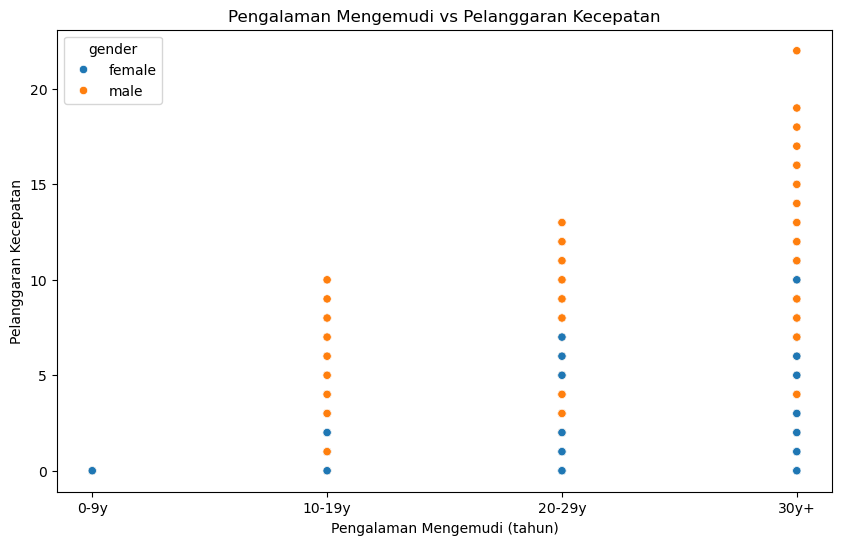

In [22]:
# Perbandingan Pengalaman Mengemudi dengan Pelanggaran Kecepatan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='driving_experience', y='speeding_violations', data=df, hue='gender')
plt.title('Pengalaman Mengemudi vs Pelanggaran Kecepatan')
plt.xlabel('Pengalaman Mengemudi (tahun)')
plt.ylabel('Pelanggaran Kecepatan')
plt.show()


- Kesimpulan PLOT4 :  membandingkan persentase pelanggaran kecepatan antara pengemudi pria dan wanita berdasarkan pengalaman mengemudi mereka.

- Kesimpulan utama dari gambar ini adalah:

    a. Pengemudi pria lebih sering melakukan pelanggaran kecepatan daripada pengemudi wanita di semua kategori pengalaman mengemudi.
    b. Selisih persentase pelanggaran kecepatan antara pengemudi pria dan wanita terbesar pada kategori pengalaman mengemudi 0-9 tahun.
    c. Selisih persentase pelanggaran kecepatan antara pengemudi pria dan wanita semakin kecil seiring dengan bertambahnya pengalaman mengemudi.

### PLOT5 MELIHAT PERBANDINGAN CREADIT SCORE DENGAN OUTCOME 

C:\Users\Salman\AppData\Local\Temp\ipykernel_31952\1845096109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y='credit_score', data=df, palette='viridis')


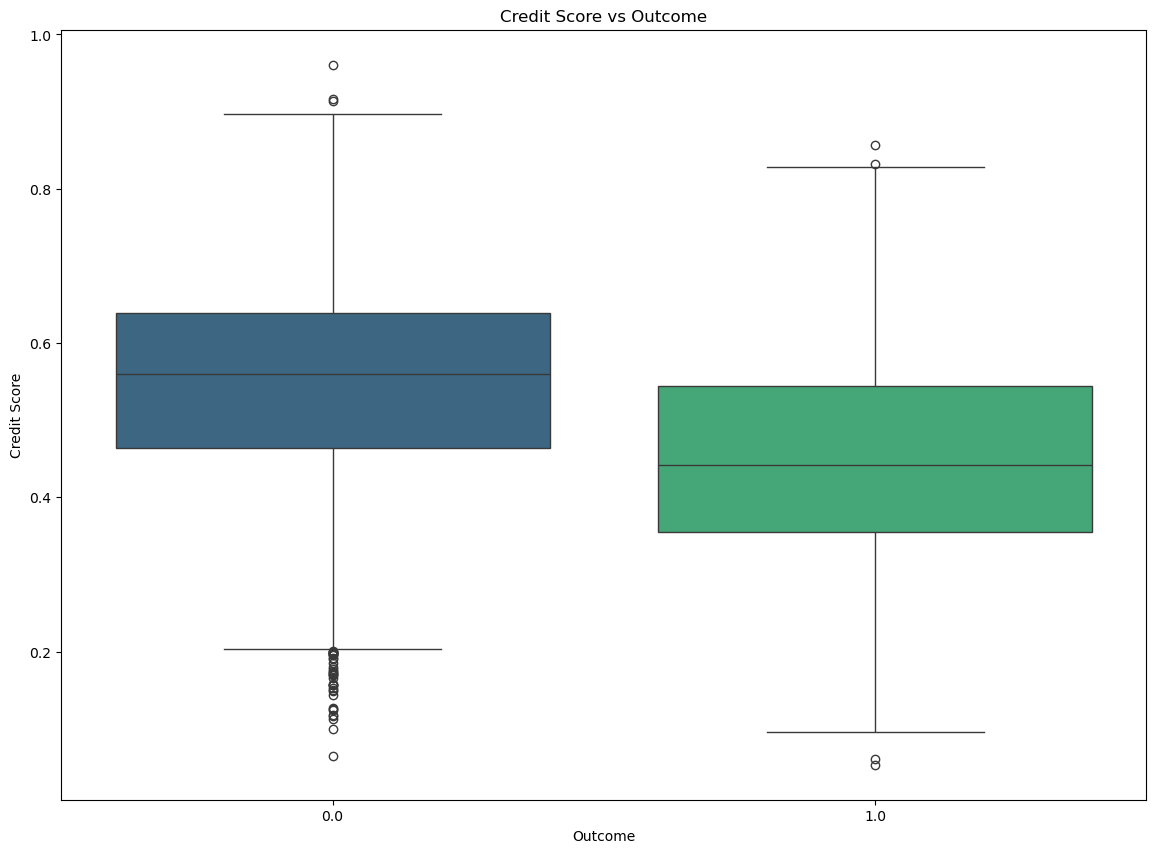

In [23]:
# Plot 6: Credit Score vs Outcome
plt.figure(figsize=(14, 10))
sns.boxplot(x='outcome', y='credit_score', data=df, palette='viridis')
plt.title('Credit Score vs Outcome')
plt.xlabel('Outcome')
plt.ylabel('Credit Score')
plt.show()


- Penjelasan PLOT5:
1. Plot ini menunjukkan distribusi skor kredit berdasarkan outcome menggunakan boxplot.
2. Analisis: Distribusi skor kredit menunjukkan variasi yang berbeda antara yang mengajukan klaim dan yang tidak.
3. Insight: Skor kredit mungkin berhubungan dengan perilaku klaim. Pelanggan dengan skor kredit lebih rendah mungkin lebih cenderung mengajukan klaim. Informasi ini dapat digunakan dalam penilaian risiko.

### PLOT6 MELIHAT JUMLAH KENDARAAN BERDASARKAN JENIS KENDARAAN

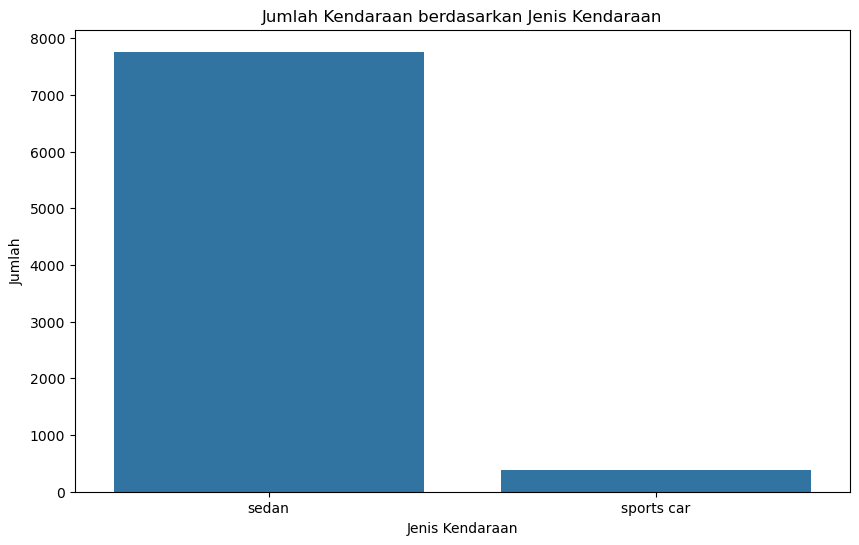

In [24]:
#count plot untuk jenis kendaraan
plt.figure(figsize=(10, 6))
sns.countplot(x='vehicle_type', data=df)
plt.title('Jumlah Kendaraan berdasarkan Jenis Kendaraan')
plt.xlabel('Jenis Kendaraan')
plt.ylabel('Jumlah')
plt.show()


- penjelasan PLOT6:
1. Berdasarkan grafik, terlihat bahwa persentase orang yang memiliki mobil sport lebih tinggi daripada persentase orang yang memiliki sedan. Hal ini menunjukkan bahwa mobil sport lebih populer daripada sedan.
2. Analisis :
Ada beberapa kemungkinan alasan mengapa mobil sport lebih populer daripada sedan. Pertama, mobil sport umumnya dianggap lebih bergengsi dan menarik daripada sedan. Kedua, mobil sport seringkali lebih cepat dan lebih lincah daripada sedan, sehingga lebih menyenangkan untuk dikendarai. Ketiga, mobil sport seringkali memiliki fitur dan teknologi yang lebih canggih daripada sedan.

    Namun, penting untuk dicatat bahwa grafik ini hanya menunjukkan persentase orang yang memiliki mobil sport dan sedan. Grafik ini tidak menunjukkan jumlah total orang yang memiliki mobil sport dan sedan. Ada kemungkinan bahwa ada lebih banyak orang yang memiliki sedan secara keseluruhan, meskipun persentase orang yang memilikinya lebih rendah.

    Selain itu, grafik ini tidak menunjukkan alasan mengapa orang memilih untuk membeli mobil sport atau sedan. Ada banyak faktor lain yang dapat memengaruhi keputusan pembelian seseorang, seperti harga, keandalan, dan konsumsi bahan bakar.

### PLOT 7 PERBANDINGAN ANNUAL MILEAGE DENGAN OUTCOME

C:\Users\Salman\AppData\Local\Temp\ipykernel_31952\4171158270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y='annual_mileage', data=df, palette='viridis')


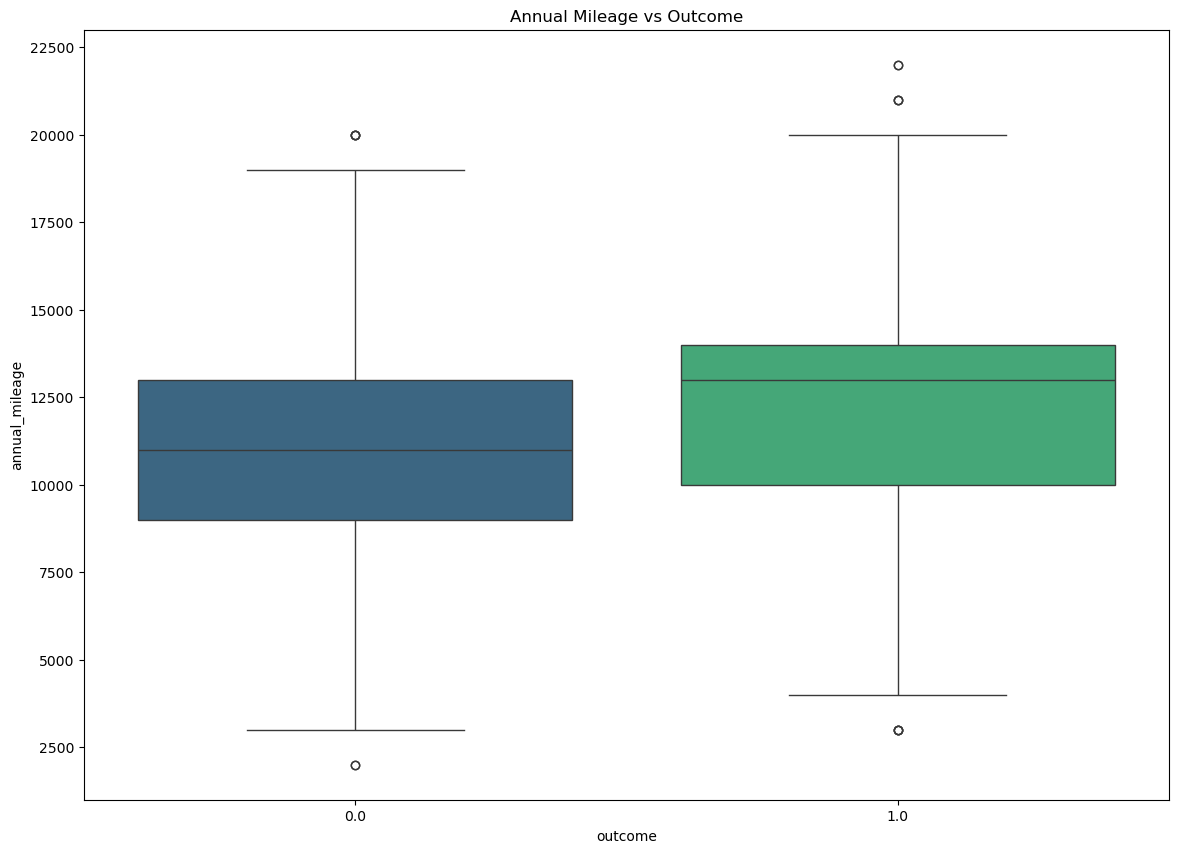

In [25]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='outcome', y='annual_mileage', data=df, palette='viridis')
plt.title('Annual Mileage vs Outcome')
plt.xlabel('outcome')
plt.ylabel('annual_mileage')
plt.show()


- Penjelasan:
1. Plot ini menunjukkan distribusi jarak tempuh tahunan berdasarkan outcome menggunakan boxplot.
2. Analisis:
Distribusi jarak tempuh tahunan (Annual Mileage) menunjukkan variasi yang berbeda antara yang mengajukan klaim dan yang tidak.
3. Insight:
Pelanggan dengan jarak tempuh tahunan yang lebih tinggi mungkin lebih berisiko mengajukan klaim. Perusahaan asuransi dapat mempertimbangkan jarak tempuh tahunan saat menilai risiko.

### PLOT8 MELIHAT OUTCOME DENGAN PENGALAMAN MENGEMUDI

C:\Users\Salman\AppData\Local\Temp\ipykernel_31952\272499366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y='driving_experience', data=df, palette='viridis')


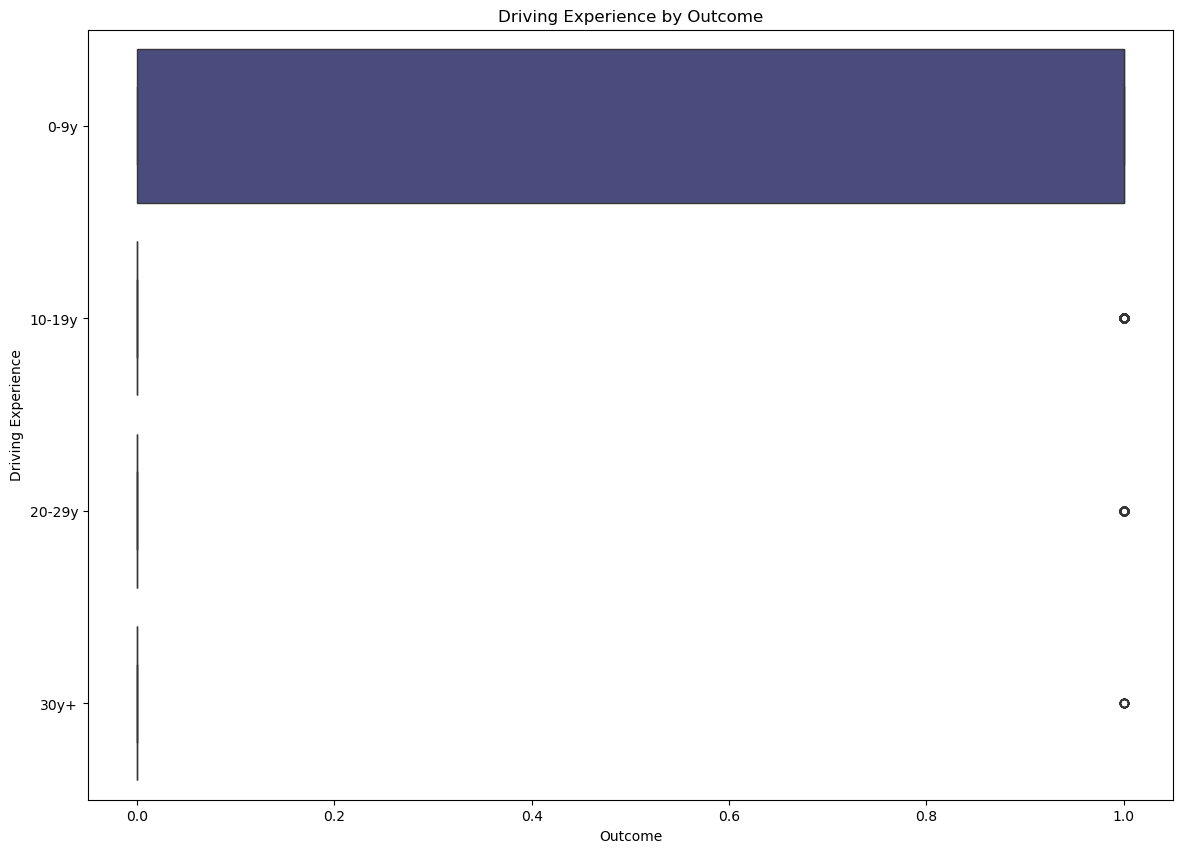

In [26]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='outcome', y='driving_experience', data=df, palette='viridis')
plt.title('Driving Experience by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Driving Experience')
plt.show()

- penjelasan 
1. Risiko Berdasarkan Pengalaman: Pengemudi dengan pengalaman mengemudi lebih sedikit mungkin lebih berisiko mengajukan klaim asuransi. Perusahaan asuransi dapat menggunakan informasi ini untuk strategi penilaian risiko.
2. Penetapan Premi: Pengemudi dengan pengalaman mengemudi lebih sedikit mungkin perlu dikenakan premi lebih tinggi untuk mencerminkan risiko yang lebih tinggi.

# Feature Engineering
___

karena akan melakukan regresi yang merupakan supervised learning, maka data akan dibagi menjadi feature X dan label/target Y. Lalu kedua dataset tersebut juga akan dibagi menjadi train-set dan test-set.

### Split train and test
memisahkan antara label dan fitur

In [27]:
X = df.drop('outcome', axis=1) #drop kolom outcome di sumbu x adalah feature nya
y = df['outcome'] # sedangkan y adalah label nya

In [28]:
#Splitting between train set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
#70 train: 30 test
#80 train: 20 test

print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)
X_train

Train size :  (6519, 17)
Test size :  (1630, 17)


,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents
3478,65+,male,majority,30y+,university,upper class,0.559548,1.0,before 2015,1.0,1.0,10238,10000.0,sedan,5,1,3
5100,26-39,female,majority,10-19y,high school,working class,0.534190,1.0,before 2015,0.0,1.0,10238,10000.0,sedan,0,1,1
9399,40-64,female,majority,20-29y,high school,middle class,0.474382,0.0,before 2015,0.0,1.0,32765,12000.0,sedan,1,0,0
8337,40-64,male,majority,20-29y,high school,upper class,0.609254,0.0,after 2015,1.0,1.0,10238,11000.0,sedan,2,0,2
9060,26-39,female,majority,0-9y,university,upper class,0.668711,1.0,after 2015,1.0,1.0,10238,11000.0,sedan,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,40-64,female,majority,0-9y,none,working class,0.416749,0.0,before 2015,0.0,1.0,10238,17000.0,sedan,0,0,0
6392,26-39,male,majority,10-19y,high school,middle class,0.650989,1.0,before 2015,1.0,0.0,10238,14000.0,sedan,4,0,2
4890,65+,female,minority,0-9y,high school,upper class,0.617478,1.0,before 2015,1.0,1.0,10238,9000.0,sedan,0,0,0
295,16-25,male,majority,0-9y,none,poverty,0.285998,0.0,before 2015,0.0,1.0,10238,12000.0,sedan,0,0,0


In [29]:
df['credit_score'].unique()

array([0.62902731, 0.35775712, 0.49314579, ..., 0.47094023, 0.36418478,
       0.43522478])

In [30]:
#cek missing values sumbu y
y_train.isna().sum()

0

In [31]:
#cek missing values sumbu y
y_test.isna().sum()

0

In [32]:
#CEK MISSING VALUES
X_train.isna().sum()

age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
dtype: int64

# Handling Outlier
___

langkah dibawah ini adalah melakukan pemilihan kolom yang termasuk ke dalam kategori numerical dan categorical. Pemisahan kolom ini sudah pastikan bahwa data sudah sesuai sesuai kategori nya. Dan data ini sudah dipastikan bisa dilihat juga dari penjelasan tentang data undertanding nya.

In [33]:
# memilih kolom-kolom numerik dan ketegorikal dari xtrain
num_cols = ['credit_score', 'annual_mileage', 'speeding_violations', 'past_accidents']
cat_cols = ['age', 'gender','postal_code', 'race', 'married', 'children','driving_experience', 'education', 'income',  'vehicle_ownership','duis','vehicle_year', 'vehicle_type']

#menampilkan hasil pemilihan kolom,
print(f'numerical columns   : {num_cols}')
print(f'categorical columns : {cat_cols}')

numerical columns   : ['credit_score', 'annual_mileage', 'speeding_violations', 'past_accidents']
categorical columns : ['age', 'gender', 'postal_code', 'race', 'married', 'children', 'driving_experience', 'education', 'income', 'vehicle_ownership', 'duis', 'vehicle_year', 'vehicle_type']


In [34]:
#loopiong pada setiap kolom numerik dalam X_train nya
for i in X_train[num_cols].columns.tolist(): #untuk mendapatkan daftar nama kolom yang bersifat numerik dari kolom xtrain,num_cols
    #cetak nilai skewness dari kolom nya
    print(f'skewness {i}: {X_train[i].skew()}')

skewness credit_score: -0.2319814740522
skewness annual_mileage: 0.03796247452579631
skewness speeding_violations: 2.29844119188493
skewness past_accidents: 2.2116765933680473


penjelasan hasil di atas:
- hasil di atas adalah hasil skew dari handle kolom numerik.
- skewness credit_score: -0.2319814740522

    Penjelasan: Nilai skewness negatif ini menunjukkan bahwa distribusi credit_score sedikit condong ke kiri. Namun, karena nilai skewness-nya mendekati 0 (sekitar -0.23), distribusi credit_score cukup simetris, meskipun dengan sedikit kecenderungan ke arah nilai yang lebih rendah.

- skewness annual_mileage: 0.03796247452579631

    Penjelasan: Nilai skewness positif yang sangat kecil ini menunjukkan bahwa distribusi annual_mileage hampir simetris, dengan sedikit kecenderungan ke kanan. Nilai skewness sebesar 0.037 ini sangat dekat dengan 0, menunjukkan bahwa data annual_mileage hampir normal.

- skewness speeding_violations: 2.29844119188493

    Penjelasan: Nilai skewness positif yang tinggi ini menunjukkan bahwa distribusi speeding_violations sangat condong ke kanan. Ini berarti bahwa sebagian besar nilai speeding_violations terkonsentrasi di sisi kiri (nilai rendah), dengan ekor panjang ke arah kanan (nilai tinggi). Kemungkinan ada beberapa individu dengan jumlah pelanggaran kecepatan yang sangat tinggi dibandingkan dengan mayoritas.

- skewness past_accidents: 2.2116765933680473

    Penjelasan: Nilai skewness positif yang tinggi ini menunjukkan bahwa distribusi past_accidents juga sangat condong ke kanan. Mirip dengan speeding_violations, ini berarti sebagian besar nilai past_accidents terkonsentrasi di sisi kiri (nilai rendah), dengan ekor panjang ke arah kanan (nilai tinggi). Beberapa individu mungkin memiliki jumlah kecelakaan masa lalu yang sangat tinggi dibandingkan dengan mayoritas.


In [35]:
#ketiga kolom dibawah ini digunakan untuk menyimpan nama kolom "normal", "skew", "extreme"
normal = []
skew = []
extreme = []

#untuk melakukan iterasi setiap kolom numerik di sumbu xtrain
for i in X_train[num_cols].columns.tolist():
    if X_train[i].skew() < 0.5 and X_train[i].skew() > -0.5: #jika nilai kolom "i" berada di antara -0.5, kolom dianggap normal dan dimasukan ke dalam list normal
        normal.append(i)
    elif X_train[i].skew() > 1 or X_train[i].skew() < -1: #jika nilai kolom "i" lebih dari 1 atau kurang dari -1, kolom masuk ke dalam kategori extreme
        extreme.append(i)
    else: #jika tidak memenuhi kondisi di atas (antara nilai skew -1 dan -0.5 atau antara 0.5 dan 1) maka masuk kedalam list skew
        skew.append(i)
        
        
print("normal columns:", normal) #untuk mencetak nama kolom-kolom yang dimasukan ke dalam ketegori normal
print("skew columns:", skew) #untuk mencetak nama kolom-kolom yang dimasukan ke dalam ketegori skew
print("extremen columns:", extreme ) #untuk mencetak nama kolom-kolom yang dimasukan ke dalam ketegori extreme

normal columns: ['credit_score', 'annual_mileage']
skew columns: []
extremen columns: ['speeding_violations', 'past_accidents']


In [36]:
# Metode Gaussian untuk capping outliers pada variabel dengan distribusi normal atau mendekati normal
winsorizer_normal = Winsorizer(capping_method='gaussian',  #gaussian biasanya digunakan untuk nilai skew nya simtetris 
                                 tail='both', #untuk mengaplikasikan capping ke kedua ekor distribusi
                                 fold=3, #faktor lipatan untuk menentukan nilai atas dan bawah capping
                                 variables=normal, #variable yang akan di transform
                                 missing_values='ignore') #mengabaikan nilai yang hilang

X_train_capped = winsorizer_normal.fit_transform(X_train) # Melakukan transformasi pada X_train


# Metode IQR untuk capping outliers pada variabel dengan distribusi ekstrem
winsorizer_extreme = Winsorizer(capping_method='iqr', #metode IQR
                            tail='both',  # Mengaplikasikan capping ke kedua ekor distribusi
                            fold=3, # Faktor lipatan untuk menentukan nilai atas dan bawah capping
                            variables=extreme, # Variabel yang akan di-transform
                            missing_values='ignore') # Mengabaikan nilai yang hilang

X_train_capped = winsorizer_extreme.fit_transform(X_train_capped) #digunakan untuk mebaca data yang ada

In [37]:
df.columns #untuk melihan daftrame kolumn

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

In [38]:
df.shape

(8149, 18)

In [39]:
#tahap selanjutnya yaitu menbuat data kolum 1 untuk memanggil semua kolum yang ada berjumlah 10kolum

data_column1 = X_train_capped.iloc[:, list(range(0,11))] #digunakan untuk ambil data kolom 1-11



In [40]:
data_column1['outcome'] = y_train.values #untuk memasukan price kedalam kolom 1

C:\Users\Salman\AppData\Local\Temp\ipykernel_31952\259043401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_column1['outcome'] = y_train.values #untuk memasukan price kedalam kolom 1


In [41]:
data_column1 #menampilkan data column1

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,outcome
3478,65+,male,majority,30y+,university,upper class,0.559548,1.0,before 2015,1.0,1.0,0.0
5100,26-39,female,majority,10-19y,high school,working class,0.534190,1.0,before 2015,0.0,1.0,0.0
9399,40-64,female,majority,20-29y,high school,middle class,0.474382,0.0,before 2015,0.0,1.0,0.0
8337,40-64,male,majority,20-29y,high school,upper class,0.609254,0.0,after 2015,1.0,1.0,0.0
9060,26-39,female,majority,0-9y,university,upper class,0.668711,1.0,after 2015,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9740,40-64,female,majority,0-9y,none,working class,0.416749,0.0,before 2015,0.0,1.0,1.0
6392,26-39,male,majority,10-19y,high school,middle class,0.650989,1.0,before 2015,1.0,0.0,1.0
4890,65+,female,minority,0-9y,high school,upper class,0.617478,1.0,before 2015,1.0,1.0,0.0
295,16-25,male,majority,0-9y,none,poverty,0.285998,0.0,before 2015,0.0,1.0,1.0


In [42]:
data_column1.columns #untuk melihat data column1

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'outcome'],
      dtype='object')

# Feature Selection
___

Kenapa kita harus melakukan feature selection : feature selection disini bertujuan untuk meningkatkan efisiensi dan efektivitas analisis data serta pemodelan machine learning.

Dalam feature selection kali ini, disini menggunakan phik korelasi karena penggunaan phik memiliki kemampuan untuk menangani data kategorikal dan numerikal, mendeteksi korelasi hubungan non linear antara variable karena phik disini lebih efektif dalam mengindenttifikasi fitur yang relevan.

In [43]:
phik_overview1 = data_column1.phik_matrix() #membuat phik matrix1

interval columns not set, guessing: ['credit_score', 'vehicle_ownership', 'married', 'children', 'outcome']


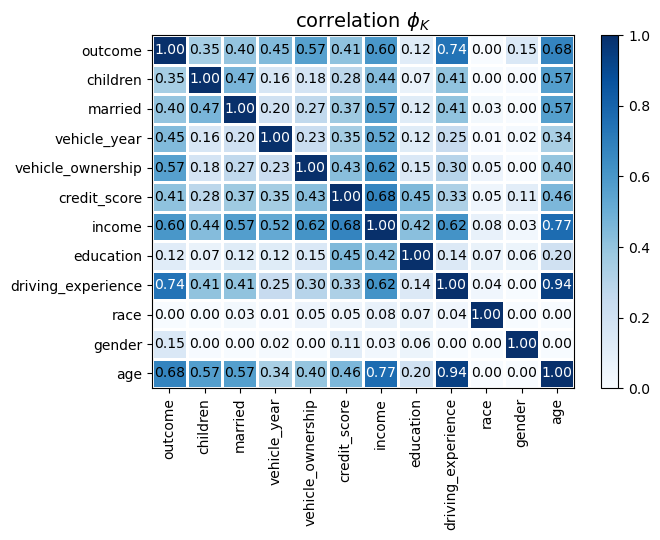

In [44]:
#visualisasi matriks korelasi phik pada setiap object data kolom
plot_correlation_matrix(phik_overview1.values,
                        x_labels=phik_overview1.columns, y_labels=phik_overview1.index, 
                        vmin=0, vmax=1, #rentang nilai pada heatmap
                        color_map='Blues', #peta warna dengan heatmap
                        title=r'correlation $\phi_K$', #judul plot dengan Tex
                        fontsize_factor=1, #ukuran font
                        figsize=(7,5.5)) #ukuran gambar nya

- PENJELASAN HASIL DI ATAS :
1. Outcome (skor kredit) memiliki korelasi positif yang kuat dengan income, education, dan driving_experience. Hal ini menunjukkan bahwa orang dengan pendapatan yang lebih tinggi, tingkat pendidikan yang lebih tinggi, dan pengalaman mengemudi yang lebih lama cenderung memiliki skor kredit yang lebih tinggi.
2. Outcome (skor kredit) memiliki korelasi negatif yang kuat dengan age. Hal ini menunjukkan bahwa orang yang lebih muda cenderung memiliki skor kredit yang lebih tinggi daripada orang yang lebih tua.
3. Outcome (skor kredit) memiliki korelasi positif yang sedang dengan vehicle_ownership. Hal ini menunjukkan bahwa orang yang memiliki lebih banyak kendaraan cenderung memiliki skor kredit yang lebih tinggi.
4. Outcome (skor kredit) memiliki korelasi positif yang sedang dengan married. Hal ini menunjukkan bahwa orang yang menikah cenderung memiliki skor kredit yang lebih tinggi daripada orang yang tidak menikah.
5. Outcome (skor kredit) memiliki korelasi negatif yang sedang dengan vehicle_year. Hal ini menunjukkan bahwa orang yang memiliki kendaraan yang lebih tua cenderung memiliki skor kredit yang lebih rendah.
6. Tidak ada hubungan yang signifikan antara outcome (skor kredit) dengan children, race, dan gender. Hal ini menunjukkan bahwa variabel-variabel tersebut tidak memiliki pengaruh yang signifikan terhadap skor kredit.

In [45]:
X_train.columns

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')

In [46]:
#untuk melihat seberapa pengaruh nya kolom dengan defaul payment
data_gabung = pd.concat([X_train, y_train], axis=1)
phik_gabung = data_gabung.phik_matrix()
phik_gabung['outcome']

interval columns not set, guessing: ['credit_score', 'vehicle_ownership', 'married', 'children', 'postal_code', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome']


age                    0.678682
gender                 0.148161
race                   0.000000
driving_experience     0.739798
education              0.115435
income                 0.602863
credit_score           0.418096
vehicle_ownership      0.566075
vehicle_year           0.446355
married                0.399407
children               0.349718
postal_code            0.296575
annual_mileage         0.239529
vehicle_type           0.000000
speeding_violations    0.336409
duis                   0.196582
past_accidents         0.284498
outcome                1.000000
Name: outcome, dtype: float64

### melihat kolom yang memiliki korelasi

In [47]:
phik_gabung['outcome']

#untuk melihat fitur yang terpakai
feature = []
for i in X_train.columns.tolist():
    if phik_gabung['outcome'][i] > 0.3:
        feature.append(i)
        
feature

['age',
 'driving_experience',
 'income',
 'credit_score',
 'vehicle_ownership',
 'vehicle_year',
 'married',
 'children',
 'speeding_violations']

In [48]:
# cek hasil drop nama pada x_train
X_train[feature]

,age,driving_experience,income,credit_score,vehicle_ownership,vehicle_year,married,children,speeding_violations
3478,65+,30y+,upper class,0.559548,1.0,before 2015,1.0,1.0,5
5100,26-39,10-19y,working class,0.534190,1.0,before 2015,0.0,1.0,0
9399,40-64,20-29y,middle class,0.474382,0.0,before 2015,0.0,1.0,1
8337,40-64,20-29y,upper class,0.609254,0.0,after 2015,1.0,1.0,2
9060,26-39,0-9y,upper class,0.668711,1.0,after 2015,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...
9740,40-64,0-9y,working class,0.416749,0.0,before 2015,0.0,1.0,0
6392,26-39,10-19y,middle class,0.650989,1.0,before 2015,1.0,0.0,4
4890,65+,0-9y,upper class,0.617478,1.0,before 2015,1.0,1.0,0
295,16-25,0-9y,poverty,0.285998,0.0,before 2015,0.0,1.0,0


In [49]:
df['postal_code'].unique()

array([10238, 32765, 92101, 21217], dtype=int64)

### langkah selanjutnya yaitu memisahkan kolom numrik dan categorical dari data di atas, berikut terlampir proses nya dibawah ini

In [50]:
# memilih kolom-kolom numerik dan ketegorikal dari xtrain
num_cols = ['credit_score', 'speeding_violations']
cat_cols = ['age', 'driving_experience', 'income',  'vehicle_ownership','vehicle_year', 'vehicle_type', 'children']

#menampilkan hasil pemilihan kolom,
print(f'numerical columns   : {num_cols}')
print(f'categorical columns : {cat_cols}')

numerical columns   : ['credit_score', 'speeding_violations']
categorical columns : ['age', 'driving_experience', 'income', 'vehicle_ownership', 'vehicle_year', 'vehicle_type', 'children']


Note: Dari data diatas bisa dilihat bahwa yang termasuk kolom numerical adalah kolom dari ['credit_score', 'speeding_violations'], sedangkan yang termasuk kolom categorical  (sesuatu yang bisa di urutkan) adalah ['age', 'driving_experience', 'income', 'vehicle_ownership', 'vehicle_year', 'vehicle_type', 'children']

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6519 entries, 3478 to 6350
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  6519 non-null   object 
 1   gender               6519 non-null   object 
 2   race                 6519 non-null   object 
 3   driving_experience   6519 non-null   object 
 4   education            6519 non-null   object 
 5   income               6519 non-null   object 
 6   credit_score         6519 non-null   float64
 7   vehicle_ownership    6519 non-null   float64
 8   vehicle_year         6519 non-null   object 
 9   married              6519 non-null   float64
 10  children             6519 non-null   float64
 11  postal_code          6519 non-null   int64  
 12  annual_mileage       6519 non-null   float64
 13  vehicle_type         6519 non-null   object 
 14  speeding_violations  6519 non-null   int64  
 15  duis                 6519 non-null   int

In [52]:
print(X_train.shape)
print(y_train.shape)

(6519, 17)
(6519,)


In [53]:
num_cols

['credit_score', 'speeding_violations']

In [54]:
cat_cols

['age',
 'driving_experience',
 'income',
 'vehicle_ownership',
 'vehicle_year',
 'vehicle_type',
 'children']

langkah selanjutnya yaitu dengan melakukan perintah peggabungan scaller + encoding dengan menggunakan perintah CT / Columntranformer . syntax bisa dilihat dibawah ini.

In [55]:
#untuk menentukan urutan yang akan digunakan pada ordinal encoder
age_categori = ['16-25','26-39','40-64','65+']
income_categori = ['poverty', 'middle class', 'working class', 'upper class']
drivingex_categori= ['0-9y','10-19y', '20-29y','30y+' ]

In [56]:
# scaling ancoding using columntransformer
ct = ColumnTransformer([ 
    ('scaler', StandardScaler(), num_cols),
    ('encodernominal', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['children','vehicle_ownership','vehicle_type','vehicle_year']),
    ('encoderordinal', OrdinalEncoder(categories=[age_categori,income_categori,drivingex_categori]), ['age','income','driving_experience']),

],remainder='drop')

- penjelasan alasan menggunakan scaler dan encoder :
1. Standardscaller : karena syntax disini dilakukan untuk menstandarkan fitur-fitur dengan mengurangi mean dan menskalakan ke standar deviasi 1, dan juga kerena banyak nya algoritma machinelearning bekerja lebih baik atau lebih cepat ketika fitur-fitur numerik memiliki skala yang sama. Ini terutama penting untuk algoritma berbasis jarak seperti KNN atau SVM, dan juga untuk model linear seperti regresi linier.
2. OneHotEncoder: Mengubah kolom kategorikal menjadi format one-hot encoding, di mana setiap kategori direpresentasikan sebagai kolom biner (0 atau 1). Alasan: Banyak algoritma pembelajaran mesin tidak dapat bekerja dengan data kategorikal secara langsung dan memerlukan input numerik. One-hot encoding adalah cara umum untuk mengubah data kategorikal menjadi numerik tanpa memberikan preferensi urutan pada kategori tersebut.

In [57]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 6519 entries, 3478 to 6350
Series name: outcome
Non-Null Count  Dtype  
--------------  -----  
6519 non-null   float64
dtypes: float64(1)
memory usage: 101.9 KB


# Model definition
___

Kode di dibawah ini menggunakan fungsi make_pipeline dari library scikit-learn untuk membuat pipeline yang menggabungkan preprocessing steps dan model machine learning. 
Dalam model definition ini juga untuk melakukan implementasi algoritma KNN, Decision Tree, SVM, Random Forest dan juga algoritma XGBOOST.

In [58]:
# define model using pipeline /pipe line itu seperti fungsi, tapi fungsinya berurutan.
pipe_destree = make_pipeline(ct, DecisionTreeClassifier()) #Pipeline dengan Decision Tree Classifier 
pipe_knn = make_pipeline(ct, KNeighborsClassifier()) #Pipeline dengan K-Nearest Neighbors Classifier
pipe_svc = make_pipeline(ct, SVC()) #Pipeline dengan Support Vector Classifier
pipe_adaboost = make_pipeline(ct, AdaBoostClassifier()) #Pipeline dengan AdaBoost Classifier
pipe_rf = make_pipeline(ct, RandomForestClassifier()) #Pipeline dengan Random Forest Classifier
pipe_xgboost = make_pipeline(ct, XGBClassifier()) #Pipeline dengan XGBoost Classifier


## penjelasan syntax pipeline di atas :
- Kegunaan: Menggunakan Decision Tree untuk klasifikasi data yang sudah diproses. Decision Tree baik untuk data dengan hubungan non-linear dan mudah diinterpretasi.
- Kegunaan: Menggunakan KNN untuk klasifikasi berdasarkan kedekatan (jarak) data yang sudah diproses. KNN baik untuk data dengan distribusi yang jelas antar kelas.
- Kegunaan: Menggunakan AdaBoost untuk meningkatkan performa model dengan kombinasi beberapa model keputusan sederhana (weak learners). AdaBoost baik untuk meningkatkan akurasi pada data yang kompleks.
- Kegunaan: Menggunakan Random Forest untuk klasifikasi dengan kombinasi banyak pohon keputusan. Random Forest baik untuk data dengan banyak fitur dan dapat mengurangi overfitting.
- Kegunaan: Menggunakan XGBoost untuk klasifikasi dengan boosting yang efisien dan kuat. XGBoost baik untuk data yang besar dan kompleks, serta seringkali memberikan performa terbaik di banyak kompetisi machine learning.

___


Kode di dibawah ini  menggunakan fungsi cross_val_score dari library scikit-learn untuk mengevaluasi performa beberapa model dengan teknik cross-validation. 6 model yang dievaluasi adalah deccision tree, Support Vector Classifier (pipe_svc), dan K-Nearest Neighbors (pipe_knn), adaboost(pipe_Adaboost), randomforest(pipe_rf), xgboost(pipe_xgboost).

In [59]:
# crossval for each model = 
cv_destree_model = cross_val_score(pipe_destree, X_train_capped, y_train, cv=5,scoring='f1',n_jobs=-1)
cv_svc_model = cross_val_score(pipe_svc, X_train_capped, y_train, cv=5,scoring='f1',n_jobs=-1)
cv_knn_model = cross_val_score(pipe_knn, X_train_capped, y_train, cv=5,scoring='f1',n_jobs=-1)
cv_adaboost_model = cross_val_score(pipe_adaboost,X_train_capped, y_train, cv=5,scoring='f1',n_jobs=-1)
cv_rf_model = cross_val_score(pipe_rf,X_train_capped, y_train, cv=5,scoring='f1',n_jobs=-1)
cv_xgboost_model = cross_val_score(pipe_xgboost,X_train_capped, y_train, cv=5,scoring='f1',n_jobs=-1)

penjelasan crossval : penggunaan cross-validation untuk mengevaluasi kinerja beberapa model machine learning.langkah yang penting dalam pengembangan model karena membantu memastikan bahwa model tidak hanya baik dalam mempelajari data pelatihan tetapi juga umumnya baik dalam memprediksi data baru.
    Kenapa menggunakan f1 score, yang merupakan ukuran gabungan dari presisi (precision) dan recall. Ini cocok digunakan untuk dataset yang tidak seimbang (imbalanced datasets) di mana kelas target positif (claim assuransi) mungkin jarang terjadi.

- langkah selanjutnya yaitu dengan mencari best model setelah melakukan proses crossval, dengan melakukan syntax looping berikut ini


In [60]:
#looping to find best model
name_model = []
cv_score = 0
for cv,name in zip([cv_destree_model,cv_svc_model,cv_knn_model,cv_adaboost_model,cv_rf_model],
 ['DecisionTree','SVC','KNN','AdaBoost','RandomForest','XGBClassifier']):
 print(name)
 print(f'f1 Score - ALL - Cross Validation: {cv}')
 print(f'mean: {cv.mean()}')
 print(f'std: {cv.std()})')
 print('-'*50)
 name_model.append(name)
 if cv.mean() > cv_score:
  cv_score = cv.mean()
  best_model = name
else:
    pass

print(f'Best Model: {best_model}')
print(f'Cross Val Mean from Best Model: {cv_score}')


DecisionTree
f1 Score - ALL - Cross Validation: [0.62469734 0.62111801 0.59526775 0.60096154 0.58064516]
mean: 0.6045379589377283
std: 0.016437104923747857)
--------------------------------------------------
SVC
f1 Score - ALL - Cross Validation: [0.74909964 0.72268908 0.68051948 0.72090395 0.74212369]
mean: 0.7230671676178296
std: 0.02389965971793151)
--------------------------------------------------
KNN
f1 Score - ALL - Cross Validation: [0.70379747 0.71775223 0.665786   0.66911765 0.69201521]
mean: 0.689693711378067
std: 0.019932582736108734)
--------------------------------------------------
AdaBoost
f1 Score - ALL - Cross Validation: [0.74292743 0.70501836 0.71032746 0.72706156 0.71165644]
mean: 0.71939824861889
std: 0.013866107475383336)
--------------------------------------------------
RandomForest
f1 Score - ALL - Cross Validation: [0.63383838 0.63802083 0.6381323  0.64118372 0.64424321]
mean: 0.6390836889937546
std: 0.0034807706884216073)
------------------------------------

- penjelasan model : 
      model SVC (Support Vector Classifier) dinilai sebagai model terbaik berdasarkan rata-rata F1 score dari cross-validation. 
    Hasil cross-validation menunjukkan bahwa SVC memiliki rata-rata F1 score yang lebih tinggi daripada model lain yang dievaluasi. Hal ini menunjukkan bahwa SVC secara konsisten memberikan kinerja yang lebih baik dalam memprediksi kelas target (Claim Assuransi atau Tidak Claim Assuransi) dalam dataset.

    Pemilihan model terbaik tidak hanya berdasarkan rata-rata skor, tetapi juga mempertimbangkan trade-off antara kinerja, kompleksitas model, dan interpretasi hasil. SVC dipilih karena kemampuannya yang baik dalam menangani kasus non-linear dan performa yang solid dalam cross-validation.
    ___

In [61]:
y_train

3478    0.0
5100    0.0
9399    0.0
8337    0.0
9060    0.0
       ... 
9740    1.0
6392    1.0
4890    0.0
295     1.0
6350    1.0
Name: outcome, Length: 6519, dtype: float64

In [62]:
print("Nama kolom di X_train:", X_train.columns)

Nama kolom di X_train: Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')


# model training
___

tahap berikut ini adalah tahap untuk melakukan model training menggunakan SVC.

In [63]:
# berfungsi untuk melatih model SVM yang telah dimasukkan ke dalam sebuah Pipeline. 
pipe_svc.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['credit_score',
                                                   'speeding_violations']),
                                                 ('encodernominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['children',
                                                   'vehicle_ownership',
                                                   'vehicle_type',
                                                   'vehicle_year']),
                                                 ('encoderordinal',
                                                  OrdinalEncoder(categories=[['16-25',
                                                                              '26-39',
                                                                              '40-64',
                                                                              '65+'],
                                                                             ['poverty',
                                                                              'middle '
                                                                              'class',
                                                                              'working '
                                                                              'class',
                                                                              'upper '
                                                                              'class'],
                                                                             ['0-9y',
                                                                              '10-19y',
                                                                              '20-29y',
                                                                              '30y+']]),
                                                  ['age', 'income',
                                                   'driving_experience'])])),
                ('svc', SVC())])

# model evaluation
___

In [64]:
#untuk melakukan prediksi dengan model yang telah dilatih menggunakan Pipeline dengan model Logistic Regression (pipe_log_reg)
y_pred_train = pipe_svc.predict(X_train_capped)
y_pred_test  = pipe_svc.predict(X_test)
y_pred_train

array([0., 0., 0., ..., 1., 1., 1.])

## confusion matrix
___

F1 Score - Test set :  0.7239382239382239 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1127
         1.0       0.70      0.75      0.72       503

    accuracy                           0.82      1630
   macro avg       0.79      0.80      0.80      1630
weighted avg       0.83      0.82      0.83      1630
 

Confusion Matrix      : 


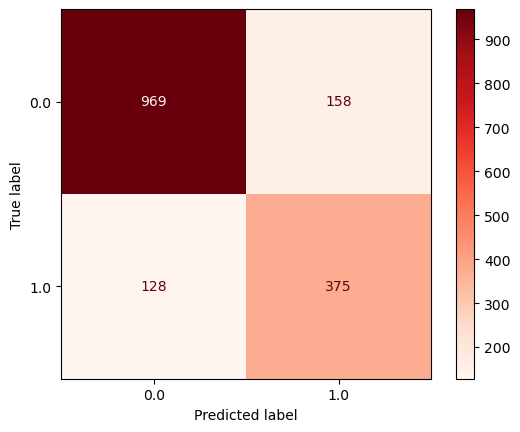

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

#untuk melakukan evaluasi dan analisis kinerja dari model Logistic Regression yang sudah dilatih dan telah melakukan prediksi terhadap data uji (X_test). 
print('F1 Score - Test set : ', f1_score(y_test, y_pred_test ), '\n') # Perhitungan F1 Score
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n') # Classification Report
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Reds')) # Confusion Matrix

In [66]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
train - f1_score,0.738447
test - f1_score,0.723938


Penjelasan : data dapat dikatakan goodfit jika 80% sedangkan data ini hanya 73% itu dapat dikatakan undervit, ada beberapa upaya untuk mendapatkan train test lebih baik jika memiliki waktu yang lebih untuk explorasi diantaranya dapat saya jelaskan di analisa model dibawah:

### hyperparamer tunning 
___

In [67]:
c_estimator = [0.01,0.05,1,2]
kernel =  ['linear', 'rbf', 'poly', 'sigmoid']
gamma = ['scale','auto']
degree = [1,3,5]

grid_search_params = {
    'svc__C': c_estimator,
    'svc__kernel': kernel,
    'svc__gamma': gamma,
    'svc__degree': degree

}

grid_search_params

{'svc__C': [0.01, 0.05, 1, 2],
 'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
 'svc__gamma': ['scale', 'auto'],
 'svc__degree': [1, 3, 5]}

In [68]:
%%time
grid_search = GridSearchCV(estimator=pipe_svc,
                         param_grid=grid_search_params,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='f1')

grid_search.fit(X_train_capped, y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: total: 4.48 s
Wall time: 1min 38s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['credit_score',
                                                                          'speeding_violations']),
                                                                        ('encodernominal',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['children',
                                                                          'vehicle_ownership',
                                                                          'vehicle_type',
                                                                          'vehicle_year']),
                                                                        ('encoderordinal',
                                                                         OrdinalEncoder(categories=[...',
                                                                                                     '26-39',
                                                                                                     '40-64',
                                                                                                     '65+'],
                                                                                                    ['poverty',
                                                                                                     'middle '
                                                                                                     'class',
                                                                                                     'working '
                                                                                                     'class',
                                                                                                     'upper '
                                                                                                     'class'],
                                                                                                    ['0-9y',
                                                                                                     '10-19y',
                                                                                                     '20-29y',
                                                                                                     '30y+']]),
                                                                         ['age',
                                                                          'income',
                                                                          'driving_experience'])])),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.05, 1, 2], 'svc__degree': [1, 3, 5],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1', verbose=2)

In [69]:
# Get Best Hyperparameters

grid_search.best_params_

{'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

penjelasan : dari data tersebut bisa dilihat bahwa best paramter dari proses tunning yaitu {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}. 


In [70]:
# Get Best Estimator

grid_search_best = grid_search.best_estimator_

F1 Score - Train Set   :  0.7484248424842485 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      4486
         1.0       0.69      0.82      0.75      2033

    accuracy                           0.83      6519
   macro avg       0.80      0.83      0.81      6519
weighted avg       0.84      0.83      0.83      6519
 

Confusion Matrix      : 


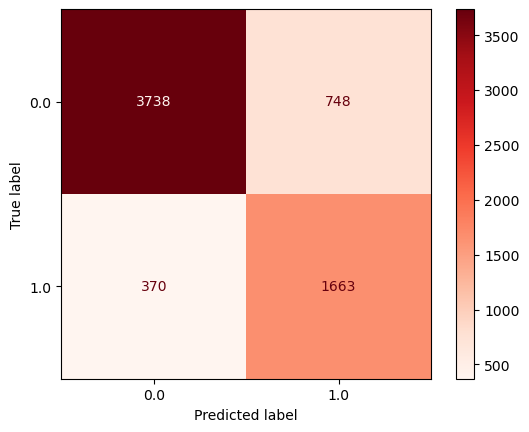

In [71]:
# Check Performance Model against Test-Set

y_pred_train = grid_search_best.predict(X_train_capped)

print('F1 Score - Train Set   : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grid_search_best, X_train_capped, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.7414104882459313 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      1127
         1.0       0.68      0.82      0.74       503

    accuracy                           0.82      1630
   macro avg       0.79      0.82      0.80      1630
weighted avg       0.84      0.82      0.83      1630
 

Confusion Matrix      : 


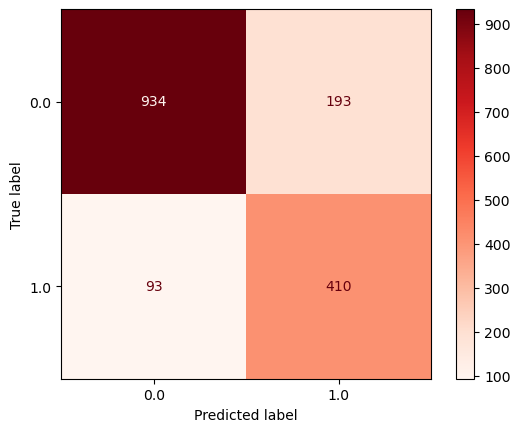

In [72]:
# Check Performance Model against Test-Set

y_pred_test = grid_search_best.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grid_search_best, X_test, y_test, cmap='Reds'))

In [73]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Grid Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search
train - f1_score,0.738447,0.748425
test - f1_score,0.723938,0.741410


- **penjelasan**: 
    analisis dari hasil tunning menunjukan bahwa data masih undervit karena masih 73% yang dimana baru dikatakan goodfit itu jika >80%. namun dari sebelum di tunning perbandingan dengan sesudah nya mengalami peningkatan train sebelum (0.738447) dan train after tunning  (0.748425), sedangkan test nya juga mengalami peningkatan yang dilihat terlampir perbandingan sebelum dan sesudah di tunning (0.723938 dan 0.741410).

### menentukan kelebihan dan kekurangan model

In [74]:
# Kelebihan dan Kekurangan Model
evaluasi = X_test
evaluasi['label'] = y_test
evaluasi['prediction'] = y_pred_test
evaluasi

# ambil data false negative
fn = evaluasi[(evaluasi['label'] == 1) &(evaluasi['prediction'] == 0)]

# ambil data false positive
fp = evaluasi[(evaluasi['label'] == 0) &(evaluasi['prediction'] == 1)]

# ambil prediksi benar
tn = evaluasi[(evaluasi['label'] == 0) &(evaluasi['prediction'] == 0)]

tp = evaluasi[(evaluasi['label'] == 1) &(evaluasi['prediction'] == 1)]


In [75]:
fn.describe().loc[['mean', '50%', 'min', 'max']]

,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,label,prediction
mean,0.524897,0.860215,0.44086,0.698925,31534.129032,12193.548387,1.827957,0.215054,0.806452,1.0,0.0
50%,0.516514,1.000000,0.00000,1.000000,32765.000000,12000.000000,1.000000,0.000000,1.000000,1.0,0.0
min,0.095387,0.000000,0.00000,0.000000,10238.000000,6000.000000,0.000000,0.000000,0.000000,1.0,0.0
max,0.819628,1.000000,1.00000,1.000000,92101.000000,20000.000000,10.000000,3.000000,6.000000,1.0,0.0



**Kesimpulan dan Insight dari Hasil Evaluasi Model**

Akurasi:

- Model memiliki akurasi 0.05, yang berarti model hanya memprediksi data dengan benar 5% dari waktu ke waktu.
Hal ini menunjukkan bahwa model perlu ditingkatkan untuk mencapai performa yang lebih baik.
Statistik Deskriptif:

- Data menunjukkan distribusi yang tidak seimbang, dengan lebih banyak data negatif (label 0) daripada data positif (label 1).
Hal ini dapat berdampak pada performa model, karena model mungkin lebih cenderung memprediksi data sebagai negatif.
False Negative (FN):

- Terdapat sejumlah data yang sebenarnya positif (label 1) tetapi diprediksi negatif (prediksi 0) oleh model.
Hal ini menunjukkan bahwa model tidak dapat mengidentifikasi beberapa data positif dengan benar.
False Positive (FP):

- Terdapat sejumlah data yang sebenarnya negatif (label 0) tetapi diprediksi positif (prediksi 1) oleh model.
Hal ini menunjukkan bahwa model salah mengidentifikasi beberapa data negatif sebagai positif.
Insight:

- Model perlu ditingkatkan untuk meningkatkan akurasinya, terutama dalam mengidentifikasi data positif.
Distribusi data yang tidak seimbang perlu diatasi untuk memastikan model tidak bias terhadap label tertentu.
Analisis lebih lanjut diperlukan untuk memahami mengapa model membuat kesalahan prediksi, seperti false negative dan false positive.

In [76]:
df.describe()

,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.00000,8149.000000,8149.000000,8149.000000,8149.000000
mean,0.516368,0.699227,0.501043,0.689287,19725.567922,11693.45932,1.485581,0.240766,1.065530,0.311204
std,0.137684,0.458622,0.500030,0.462814,18784.308198,2822.35147,2.244711,0.557408,1.665623,0.463014
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.00000,0.000000,0.000000,0.000000,0.000000
25%,0.417891,0.000000,0.000000,0.000000,10238.000000,10000.00000,0.000000,0.000000,0.000000,0.000000
50%,0.526759,1.000000,1.000000,1.000000,10238.000000,12000.00000,0.000000,0.000000,0.000000,0.000000
75%,0.620074,1.000000,1.000000,1.000000,32765.000000,14000.00000,2.000000,0.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.00000,22.000000,6.000000,15.000000,1.000000


- Penjelasan  : Berdasarkan hasil output, berikut adalah beberapa poin penting yang dapat diamati:
1. Rata-rata nilai skor kredit adalah 500.521,9068. Nilai ini menunjukkan bahwa rata-rata skor kredit dalam kumpulan data ini cukup tinggi.
2. Rata-rata nilai kepemilikan kendaraan adalah 0,515813. Nilai ini menunjukkan bahwa rata-rata orang dalam kumpulan data ini memiliki kurang dari satu kendaraan.
3. Rata-rata nilai status menikah adalah 0,697000. Nilai ini menunjukkan bahwa rata-rata orang dalam kumpulan data ini menikah.
4. Rata-rata nilai memiliki anak adalah 0,498200. Nilai ini menunjukkan bahwa rata-rata orang dalam kumpulan data ini memiliki kurang dari satu anak.
5. Rata-rata nilai pengeluaran jarak tempuh tahunan adalah 11.697,003207. Nilai ini menunjukkan bahwa rata-rata orang dalam kumpulan data ini menghabiskan sekitar 11.697 dolar AS per tahun untuk bensin.
6. Rata-rata nilai pelanggaran batas kecepatan adalah 1,482900. Nilai ini menunjukkan bahwa rata-rata orang dalam kumpulan data ini memiliki kurang dari dua pelanggaran batas kecepatan.
7. Rata-rata nilai DUI adalah 0,23920. Nilai ini menunjukkan bahwa rata-rata orang dalam kumpulan data ini memiliki kurang dari seperempat DUI.
8. Rata-rata nilai pelanggaran masa lalu adalah 0,000000. Nilai ini menunjukkan bahwa rata-rata orang dalam kumpulan data ini tidak memiliki pelanggaran masa lalu.

# MODEL SAVING
___

In [77]:
#Save the files
import pickle
import json

# Menyimpan list kolom numerik ke dalam file 'list_num_cols.txt' menggunakan format JSON
with open('gridsearch.pkl', 'wb') as file_1:
    pickle.dump(grid_search_best, file_1)

# CONCEPTUAL PROBLEM
___

## Jawab pertanyaan berikut:

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
- jawaban : Bagging  digunakan dalam machine learning untuk mengurangi overfitting dengan cara membuat beberapa subset dari dataset pelatihan menggunakan teknik bootstrap. Setiap subset ini digunakan untuk melatih model secara independen, dan prediksi dari model-model ini kemudian digabungkan dengan menggunakan rata-rata atau mayoritas voting. Teknik ini membantu meningkatkan stabilitas prediksi dan menghasilkan model yang lebih akurat, terutama pada dataset yang kompleks atau cenderung overfitting.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
- jawaban : saya memilih algoritma boosting (Adaboost) berikut penjelasan saya , Random Forest dan Adaboost adalah dua pendekatan yang berbeda dalam ensemble learning. Random Forest menggunakan banyak pohon keputusan yang dibuat secara independen dari subset acak data untuk menghasilkan prediksi. Setiap pohon memberikan suara dalam mayoritas voting untuk menentukan prediksi akhir. Di sisi lain, Adaboost membangun model secara berurutan dengan memberi bobot lebih pada contoh data yang sulit diprediksi pada setiap iterasi. Model-model dalam Adaboost fokus pada memperbaiki kesalahan prediksi dari model sebelumnya, sehingga memungkinkan untuk meningkatkan akurasi prediksi secara bertahap. 

    Dengan demikian, Random Forest lebih menekankan pada penggunaan banyak model yang bekerja secara independen dan menggabungkan hasil prediksi mereka, sementara Adaboost menggunakan pendekatan berurutan dengan mempertimbangkan bobot pada contoh data untuk meningkatkan performa prediksi.

3. Jelaskan apa yang dimaksud dengan Cross Validation !
- jawaban : Cross Validation adalah teknik penting dalam evaluasi model machine learning yang membagi dataset menjadi subset pelatihan dan pengujian secara berulang. Proses ini membantu dalam mengukur seberapa baik model dapat memprediksi data yang belum pernah dilihat sebelumnya, dengan tujuan utama untuk menghindari overfitting dan memastikan evaluasi model yang akurat. Misalnya, dalam k-fold Cross Validation, dataset dibagi menjadi k subset yang sama besar, di mana setiap subset bergantian digunakan sebagai data pengujian sementara subset lainnya sebagai data pelatihan. Setiap iterasi memberikan hasil evaluasi yang berbeda, dan hasil dari semua iterasi digunakan untuk menghitung performa model secara keseluruhan.

    Manfaat utama dari Cross Validation meliputi kemampuannya untuk mengurangi bias evaluasi dan mendeteksi overfitting. Dengan menggunakan setiap bagian dataset sebagai data pelatihan dan pengujian, Cross Validation memungkinkan penilaian yang lebih objektif terhadap kemampuan prediktif model terhadap data baru. Selain itu, teknik ini juga membantu dalam memilih model terbaik atau pengaturan parameter optimal dengan mempertimbangkan performa rata-rata dari berbagai iterasi, sehingga memperkuat kehandalan dan generalisasi dari model machine learning yang dikembangkan.

# ANALISIS MODEL
___

pada proses crossval menggunakan matrik F1score, kenapa? karena dalam dataset ini F1 score sangat cocok karena target claim assuransi bisa dikatakan sangat jarang terjadi. Alasan kenapa pakai F1 karena presisi  yang dimana artinya disini dapat mengukur prediksi Truepositif dari semua prediksi positif. Hal ini juga menunjukan seberapa baiknya model untuk menghindari prediksi yang palsu. Dari sisi Recall juga bisa untuk mengukur proporsi prediksi posistif yang benar dari semua kasus positif sebenarnya. F1 score juga memiliki kelebihan sensitivitas terhadap ketidakseimbangan data, bisa menyelaraskan antara FP dan FN, Informasi yang lebih lengkap didapatkan jika menggunakan F1 score, F1 juga konsisten dalam evaluasi.

Melihat paramter terbaik yaitu {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'} menjadi yang terbaik karena memberikan keseimbangan optimal antara bias dan varians. Nilai C sebesar 1 memberikan regulasi yang cukup untuk menghindari overfitting tanpa membuat model terlalu sederhana. Penggunaan kernel linear cocok untuk data yang dapat dipisahkan secara linier, menjadikannya lebih cepat dan sederhana dibandingkan kernel non-linear. Selain itu, gamma='scale' memberikan skala adaptif berdasarkan variabilitas fitur, memastikan pengaruh contoh pelatihan yang seimbang. Kombinasi ini memungkinkan model untuk memiliki kinerja baik pada data pelatihan dan kemampuan generalisasi yang kuat pada data baru.

Model SVC (Support Vector Classifier) menjadi best model dalam kasus data asuransi mobil ini karena kombinasi parameter yang optimal dan performa yang kuat dalam menghadapi dataset yang mungkin memiliki distribusi kelas yang tidak seimbang. 

  - Optimal Regularization (C=1): Parameter C yang diatur ke 1 memberikan keseimbangan yang baik antara meminimalkan kesalahan klasifikasi pada data pelatihan dan menghindari overfitting. 
  - Penggunaan kernel linear (kernel='linear') cocok untuk data yang dapat dipisahkan secara linier atau hampir linier. Ini menghasilkan model yang lebih sederhana dan lebih cepat dibandingkan dengan kernel non-linear seperti RBF atau polynomial, yang dapat menjadi terlalu kompleks dan rentan terhadap overfitting jika data tidak memiliki struktur non-linear yang kuat.
  - Penggunaan gamma='scale' memastikan bahwa parameter gamma diatur sesuai dengan variabilitas dalam fitur data. 
  - SVC dikenal karena kemampuannya untuk menangani trade-off antara presisi dan recall dengan baik, terutama dalam dataset yang tidak seimbang. 
  - Kinerja Konsisten: Hasil cross-validation menunjukkan bahwa SVC memiliki mean F1 score yang tinggi dan stabilitas performa yang baik (dengan std deviasi yang relatif kecil).
    



# KESIMPULAN
___

1. Data Underfit dan Eksplorasi Tambahan:
Pada tahap awal, model yang diuji menunjukkan indikasi underfit, yang berarti model terlalu sederhana untuk menangkap kompleksitas data dan memberikan performa yang kurang optimal pada data pelatihan. Underfitting biasanya disebabkan oleh model yang tidak cukup kompleks atau kurangnya fitur yang relevan.

2. Cross-Validation dan Penentuan Best Parameter:
Untuk mengatasi masalah underfit dan menemukan parameter terbaik, berbagai model (DecisionTree, SVC, KNN, AdaBoost, RandomForest) diuji menggunakan cross-validation dengan evaluasi berdasarkan F1 score. Cross-validation membantu memastikan bahwa performa model dievaluasi secara konsisten dan dapat diandalkan. Setelah proses tuning parameter, parameter terbaik untuk SVC ditemukan: {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}. 

3. Performa dan Generalisasi:
Model SVC menunjukkan performa yang konsisten dan andal pada data pelatihan dan validasi. Mean F1 score yang tinggi dan deviasi standar yang rendah dari hasil cross-validation menunjukkan bahwa model mampu memberikan prediksi yang akurat dan stabil pada data baru. Ini menunjukkan kemampuan generalisasi yang kuat, yang sangat penting dalam aplikasi dunia nyata untuk memprediksi klaim asuransi dengan baik.

4. jadi intinya melalui proses pengembangan yang sistematis, termasuk penanganan masalah underfit, tuning parameter yang tepat, dan evaluasi model yang mendalam, SVC dengan parameter {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'} terbukti menjadi model terbaik untuk prediksi klaim asuransi mobil. Pendekatan ini memastikan bahwa model tidak hanya performa optimal pada data pelatihan, tetapi juga mampu memberikan prediksi yang akurat dan andal pada data baru, sehingga dapat diandalkan dalam aplikasi dunia nyata.